<a href="https://colab.research.google.com/github/ndq3004/machine_learning/blob/master/MachineLearningCoBan/RecommendationSystem/SingleValueDecomposition/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Single value decomposition
Giảm chiều dữ liệu
"""
# from matplotlib import rc 
# rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

In [0]:
import numpy as np
from numpy import linalg as LA

m, n = 2, 3
A = np.random.rand(m, n)

U, S, V = LA.svd(A)
print('Frobenius norm of (UU^T - I) =', LA.norm(U.T) - np.eye(m))
print('\n' , S, '\n')


Frobenius norm of (UU^T - I) = [[0.41421356 1.41421356]
 [1.41421356 0.41421356]]

 [1.57213164 0.25644036] 



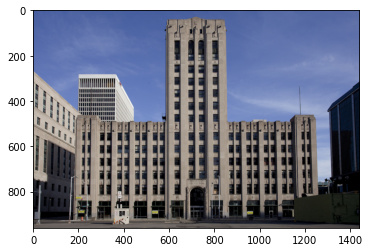

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans

link = '/content/drive/My Drive/Dataset/image-compression/'

img = mpimg.imread(link + 'building2.jpg')
plt.figure()
plt.imshow(img)
plt.show()


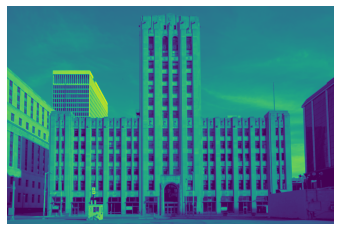

In [4]:
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
plt.imshow(gray)
plt.axis('off')
plt.show()

In [0]:
from numpy import linalg as LA 

U, S, V = LA.svd(gray)

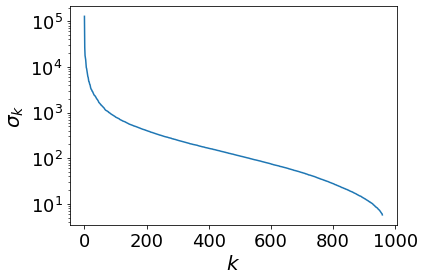

In [6]:

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('singular_value.pdf') as pdf:
    plt.semilogy(S) 
    plt.xlabel('$k$', fontsize = 20)
    plt.ylabel('$\sigma_k$', fontsize = 20)
    # We change the fontsize of minor ticks label 
    plt.tick_params(axis='both', labelsize=18)
    plt.tight_layout()
    pdf.savefig()
    plt.show()

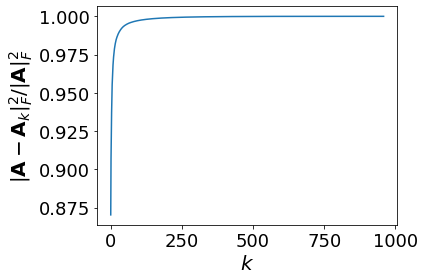

In [8]:

# percentage of preserving energy

with PdfPages('energy_preserved.pdf') as pdf:
    a = np.sum(S**2)
    b = np.zeros_like(S)
    for i in range(S.shape[0]):
        b[i] = np.sum(S[:i+1]**2, axis = 0)/a

    plt.plot(b)
    plt.xlabel('$k$', fontsize = 20)
    plt.ylabel('$\|\mathbf{A} - \mathbf{A}_k\|_F^2 / \|\mathbf{A}\|_F^2$', fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tight_layout()
    pdf.savefig()
    plt.show()

In [0]:
## error
e =  1- b

In [10]:
e[100]

0.00264089769334086

In [0]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

# A = gray
# U, S, V = LA.svd(A)
A1 = []
K = [5, 50, 100]
for k in K:
    A1.append(approx_rank_k(U, S, V,k))

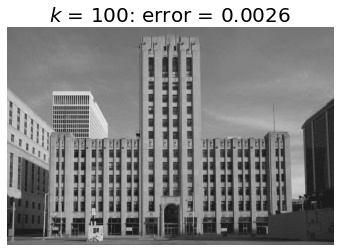

In [12]:
for i in range(3):
    plt.imshow(A1[i], cmap = 'gray')
    plt.axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    plt.title(label, fontsize = 20)
    fn = 'image2_'+str(K[i])+'.pdf'
    with PdfPages(fn) as pdf:
        pdf.savefig(bbox_inches='tight')

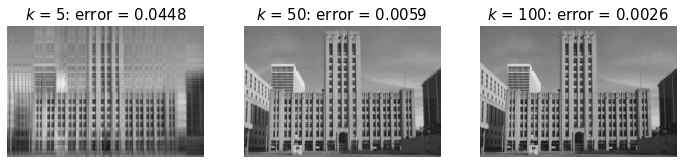

In [13]:
nrows, ncols = 1, 3
width = 4*ncols
height = 4*nrows

plt.close('all')
fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 
for i in range(3):
    axs[i].imshow(A1[i], cmap = 'gray')
    axs[i].axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    axs[i].set_title(label, fontsize = 15)
with PdfPages('image_compressed.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

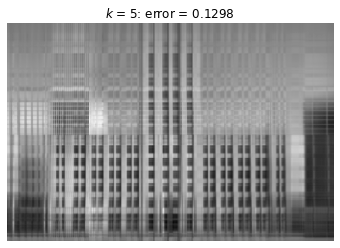

In [18]:
# show animated results
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
fig, ax = plt.subplots()
def update(i):
    ani = plt.cla()
    ani = plt.imshow(A1[i], cmap = 'gray')
    label = '$k$ = %d: error = %.4f' %(5*i + 5, e[i])
    ax.set_xlabel(label)
    ani = plt.axis('off')
    ani = plt.title(label)

    return ani, ax 

anim = FuncAnimation(fig, update, frames=np.arange(0, len(A1)), interval=500)
anim.save('a.gif', writer = 'imagemagick', fps=60)
plt.show()

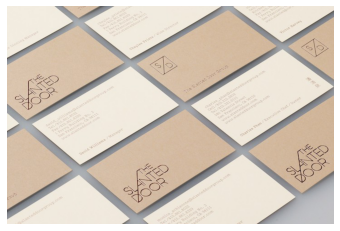

In [32]:
img = mpimg.imread(link+'img0.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]

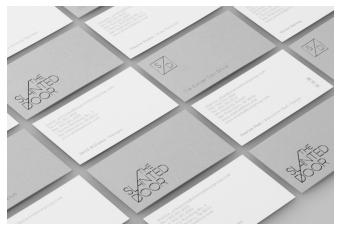

In [34]:
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.show()

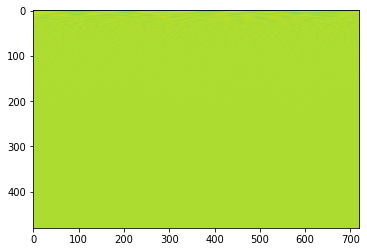

In [35]:
U, S, V = LA.svd(gray) 
img2 = np.around(np.diag(S).dot(V[:480,: ]))
plt.imshow(img2)
plt.show()

In [0]:
from google.colab import files
files.download('image2_5.pdf')

In [0]:
!apt install imagemagick

In [27]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [28]:
!ls '/content/drive/My Drive/Dataset/image-compression'

building2.jpg  img0.jpg
